# AR モデル

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

# comment out below
import json
def dict2rc(dict): return {f'{k1}.{k2}': v for k1,d in dict.items() for k2, v in d.items()}
with open('mpl_rc.json') as f:
    plt.rcParams.update(dict2rc(json.load(f)))
plt.style.use('dracula')

In [97]:
from statsmodels.tsa.stattools import acf, pacf, adfuller
from statsmodels.graphics.tsaplots import plot_acf, plot_pacf

In [10]:
isinstance(np.array([1,2]), np.ndarray)

True

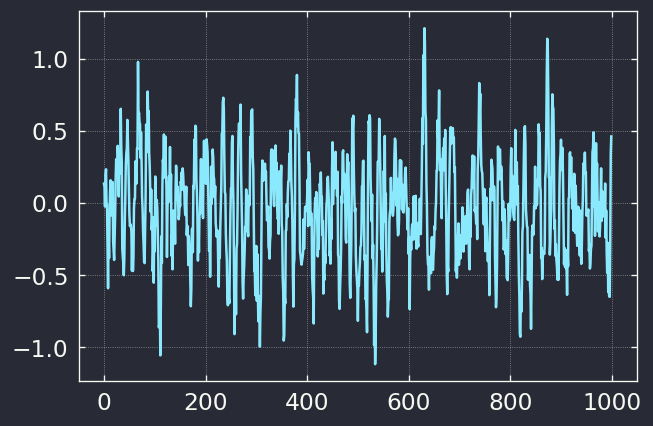

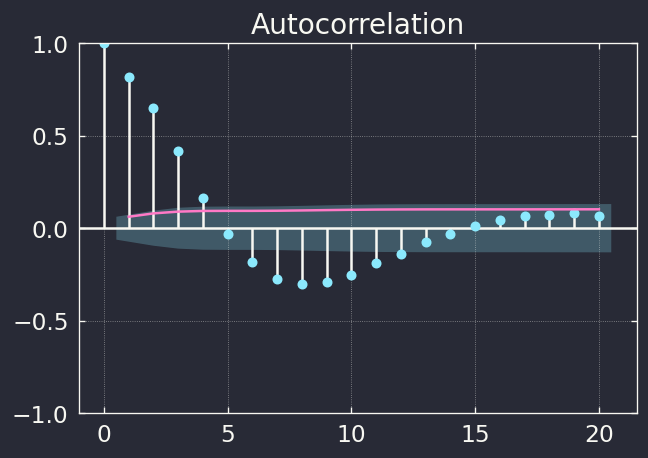

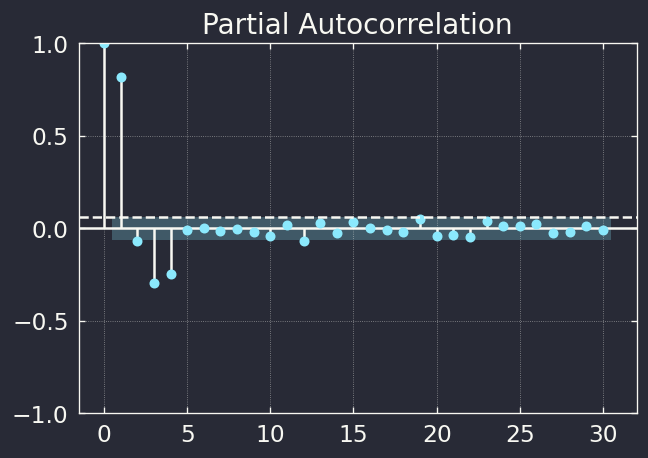

In [114]:
# AR的な時系列を生成
def generate_ar_time_series(T, coefs, sigma=1.0, seed=23):
    # coef: AR(p)のパラメータ; p=len(coefs)
    # sigma: WN(sigma^2); ここでは正規乱数を使う

    if not isinstance(coefs, np.ndarray):
        coefs = np.array(coefs)

    p = len(coefs)
    np.random.seed(seed)
    x = np.random.normal(loc=0, scale=sigma, size=T)
    for t in range(1,T):
        x[t] += np.sum(coefs[min(t,p)-1::-1] * x[max(0,t-p):t])
    return x

x = generate_ar_time_series(1000, [0.8, 0.3, -0.1, -0.3], sigma=0.2)
plt.plot(x)
lags = 20
plot_acf(x, lags=lags);
plt.plot(range(1, lags+1), np.sqrt(np.cumsum(np.power(acf(x[1:], nlags=lags),2))[:-1] / len(x[1:])) * 1.96)
plot_pacf(x); plt.axhline(1.96 / np.sqrt(len(x[1:])), linestyle='--');

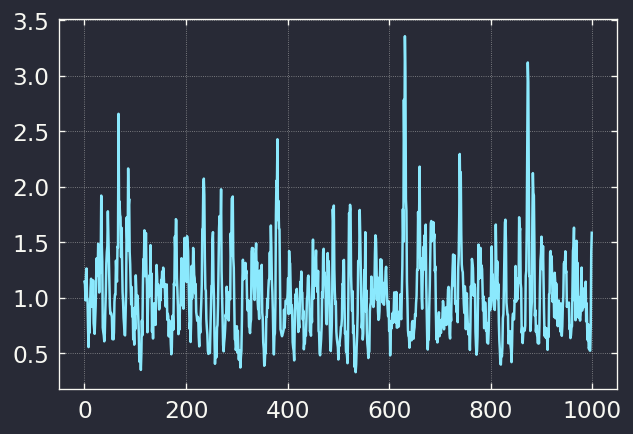

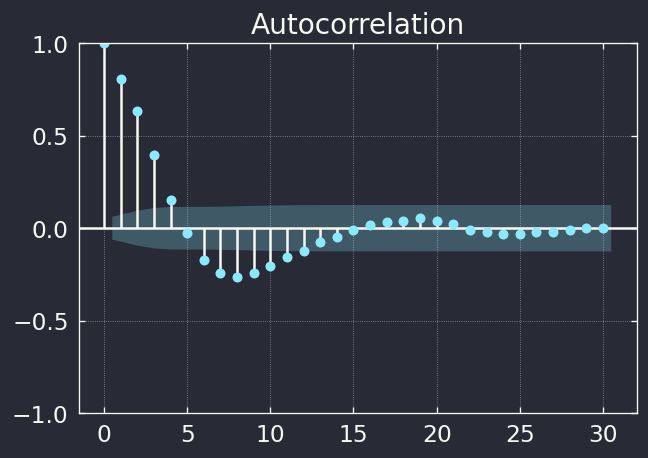

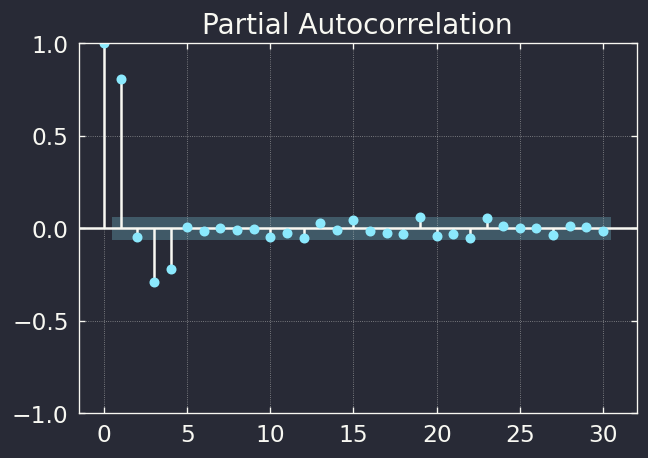

In [115]:
plt.plot(np.exp(x))
plot_acf(np.exp(x));
plot_pacf(np.exp(x));

In [116]:
adfuller(x)

(-15.701281466703495,
 1.3951259501357002e-28,
 3,
 996,
 {'1%': -3.4369325637409154,
  '5%': -2.8644462162311934,
  '10%': -2.568317409920808},
 -444.9425309753717)

In [117]:
adfuller(np.exp(x))

(-15.232683335306973,
 5.294536793134007e-28,
 3,
 996,
 {'1%': -3.4369325637409154,
  '5%': -2.8644462162311934,
  '10%': -2.568317409920808},
 -225.7452283084233)